In [1]:
import numpy as np
import pandas as pd

In [2]:
PT=pd.read_csv('PlayTennis.csv')
PT

Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No

In [3]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [4]:
PT['Outlook']=Le.fit_transform(PT['Outlook'])
PT['Temperature']=Le.fit_transform(PT['Temperature'])
PT['Humidity']=Le.fit_transform(PT['Humidity'])
PT['Wind']=Le.fit_transform(PT['Wind'])
PT['Play Tennis']=Le.fit_transform(PT['Play Tennis'])

PT

Outlook  Temperature  Humidity  Wind  Play Tennis
0         2            1         0     1            0
1         2            1         0     0            0
2         0            1         0     1            1
3         1            2         0     1            1
4         1            0         1     1            1
5         1            0         1     0            0
6         0            0         1     0            1
7         2            2         0     1            0
8         2            0         1     1            1
9         1            2         1     1            1
10        2            2         1     0            1
11        0            2         0     0            1
12        0            1         1     1            1
13        1            2         0     0            0

In [5]:
Y=PT['Play Tennis']
X=PT.drop(['Play Tennis'],axis=1)

In [6]:
from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X,Y)

[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'X[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'entropy = 0.0\nsamples = 

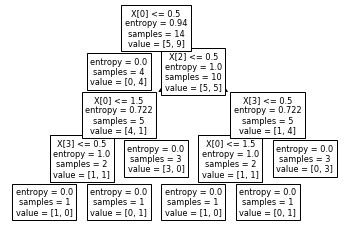

In [7]:
tree.plot_tree(clf)

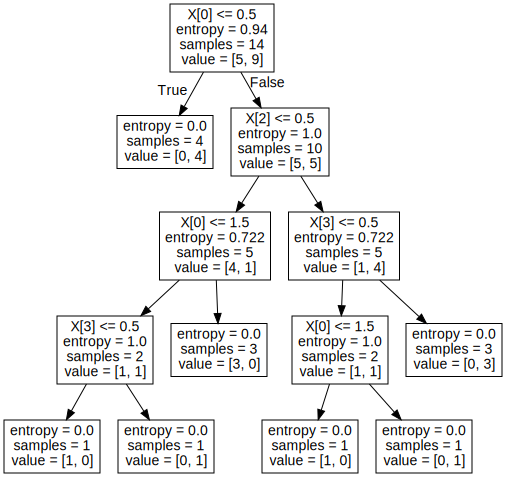

In [8]:
import graphviz
dot_data=tree.export_graphviz(clf,out_file=None)
graph=graphviz.Source(dot_data)
graph

In [9]:
X_pred=clf.predict(X)

In [10]:
X_pred==Y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: Play Tennis, dtype: bool